In [6]:
import tacoma as tc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import evaluation_networks as en
import contact_networks as cn
import os
import util
from math import sqrt, ceil
from util import plot_contact_durations
from tacoma.analysis import plot_degree_distribution
import dynetx as dn
import cdlib
from cdlib import algorithms, viz, evaluation, TemporalClustering
import networkx as nx
import tacoma as tc
import warnings
from scipy.stats.stats import pearsonr

In [7]:
path = './data_eval_split/supermarked/'
files = os.listdir(path)

In [3]:
'''fig, axs = plt.subplots(2, 2, figsize=(16, 12))
(ax1, ax2, ax3, ax4) = axs.flatten()
labels = [['contact', 'inter contact'], ['model contact', 'model inter contact']]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels2 = ['day 1', 'day 2', 'day 3', 'day 4', 'day 5', 'day 6', 'day 7']

for i, tn in enumerate(networks):
    res = tc.api.measure_group_sizes_and_durations(tn)
    plot_contact_durations(res, (ax1, ax3), fit_power_law=True, bins=100, xlabel='duration [min]', color=colors[i], label=[labels2[i], labels2[i]])

    degree = np.array(tc.api.degree_distribution(tn))
    degree = degree[degree > 0]
    plot_degree_distribution(degree, ax2, label=labels2[i])

    _, _, m = tc.edge_counts(tn)
    smoothing = 3
    m, t = util.moving_average(m[:-1], smoothing), util.moving_average(tn.t, smoothing)
    ax4.plot(t, m, color=colors[i], label=labels2[i], alpha=.5)

ax4.set_title('rolling average edge_counts')
ax2.set_title('time average degreee distribution')
ax1.set_title('contact duration')
ax3.set_title('inter contact duration')'''

"fig, axs = plt.subplots(2, 2, figsize=(16, 12))\n(ax1, ax2, ax3, ax4) = axs.flatten()\nlabels = [['contact', 'inter contact'], ['model contact', 'model inter contact']]\ncolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']\nlabels2 = ['day 1', 'day 2', 'day 3', 'day 4', 'day 5', 'day 6', 'day 7']\n\nfor i, tn in enumerate(networks):\n    res = tc.api.measure_group_sizes_and_durations(tn)\n    plot_contact_durations(res, (ax1, ax3), fit_power_law=True, bins=100, xlabel='duration [min]', color=colors[i], label=[labels2[i], labels2[i]])\n\n    degree = np.array(tc.api.degree_distribution(tn))\n    degree = degree[degree > 0]\n    plot_degree_distribution(degree, ax2, label=labels2[i])\n\n    _, _, m = tc.edge_counts(tn)\n    smoothing = 3\n    m, t = util.moving_average(m[:-1], smoothing), util.moving_average(tn.t, smoothing)\n    ax4.plot(t, m, color=colors[i], label=labels2[i], alpha=.5)\n\nax4.set_title('rolling averag

In [8]:
# Supermarked Location
A, Nv, Npps = 1220, 50, 5
Nx = int(sqrt(ceil(Nv/Npps)))
dim_x = ceil(sqrt(A)/Nx)
Loc_supermarked = cn.Location(0, Nx, Nx, dim_x, dim_x)

# Highschool Location
# Loc_hs = cn.build_location()
print(Loc_supermarked.spaces_x, Loc_supermarked.space_dim_x)

3 12


# Empirical contact network

In [5]:
EN = en.EvaluationNetwork('supermarked', path + files[0], 20)
EN.to_tacoma_tn()
tc.write_json_taco(EN.tn, './networks/supermarked/0_empirical_TU=1.taco')

0 795
edge list errors:  0
edge changes errors:  0


# RWP

In [5]:
EN = en.EvaluationNetwork('supermarked', path + files[0], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

rwp_wt_max = 120
v_RWP_min = .1
v_RWP_max = 1.
model_kwargs = {'RWP_WT_MAX': rwp_wt_max, 'v_RWP_min': v_RWP_min, 'v_RWP_max': v_RWP_max}
EN.cn_approximation(Loc_supermarked, 'RWP', model_kwargs, export=True)
res = EN.overview_plots(True, 5, smoothing=3)

0 795
edge list errors:  0
edge changes errors:  0
0 795
15900
Initialized contact network model
Start making movement
Parameters:
{'method': 'RWP', 'v_RWP_min': 0.1, 'v_RWP_max': 1.0, 'RWP_WT_MAX': 120}
finished simulation 
start working on network
Start network construction
0/15900


10000/15900
edge list errors:  0
edge changes errors:  0


# TLW

In [6]:
EN = en.EvaluationNetwork('supermarked', path + files[0], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

TLW_WT_MAX = 100  # maximum value of the waiting time distribution. Default is 100
TLW_WT_EXP = -1.8  # exponent of the waiting time distribution. Default is -1.8
FL_MAX = 50  # maximum value of the flight length distribution. Default is 50
FL_EXP = -2.6  # exponent of the flight length distribution. Default is -2.6

model_kwargs = {'TLW_WT_MAX': TLW_WT_MAX, 'TLW_WT_EXP': TLW_WT_EXP, 'FL_MAX': FL_MAX, 'FL_EXP': FL_EXP}
EN.cn_approximation(Loc_supermarked, 'TLW', model_kwargs, export=True)
res = EN.overview_plots(True, 4, 3)

0 795
edge list errors:  0
edge changes errors:  0
0 795
15900
Initialized contact network model
Start making movement
Parameters:
{'method': 'TLW', 'TLW_WT_MAX': 100, 'TLW_WT_EXP': -1.8, 'FL_MAX': 50, 'FL_EXP': -2.6}


finished simulation 
start working on network
Start network construction
0/15900
10000/15900
edge list errors:  0
edge changes errors:  0


# STEPS

In [7]:
EN = en.EvaluationNetwork('supermarked', path + files[0], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

k = 1.42 # Strenght of the attractor must be greater than 1.42
STEPS_pause_min, STEPS_pause_max = 120, 180 # default 20, 30
v_STEPS_min, v_STEPS_max = .83, 3.2 # interval for uniform distribution to pick travel speed between zones from default .83, 3.2

Loc = Loc_supermarked
model_kwargs = {'k': k, 'STEPS_pause_min': STEPS_pause_min, 'STEPS_pause_max': STEPS_pause_max, 'v_STEPS_min': v_STEPS_min, 'v_STEPS_max': v_STEPS_max}
EN.cn_approximation(Loc, 'STEPS', model_kwargs, export=True)
res = EN.overview_plots(True, 0, 3)

0 795
edge list errors:  0
edge changes errors:  0
0 795
15900
Initialized contact network model
Start making movement
Parameters:
{'method': 'STEPS', 'k': 1.42, 'STEPS_pause_min': 120, 'STEPS_pause_max': 180, 'v_STEPS_min': 0.83, 'v_STEPS_max': 3.2}
finished simulation 
start working on network
Start network construction
0/15900


10000/15900
edge list errors:  0
edge changes errors:  0


# STEPS + RWP

In [8]:
EN = en.EvaluationNetwork('supermarked', path + files[0], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

k = 1.42 # Strenght of the attractor must be greater than 1.42
STEPS_pause_min, STEPS_pause_max = 120, 180 # default 20, 30
v_STEPS_min, v_STEPS_max = .83, 3.2 # interval for uniform distribution to pick travel speed between zones from

Loc = Loc_supermarked
model_kwargs = {'k': k, 'STEPS_pause_min': STEPS_pause_min, 'STEPS_pause_max': STEPS_pause_max, 'v_STEPS_min': v_STEPS_min, 'v_STEPS_max': v_STEPS_max}
EN.cn_approximation(Loc, 'STEPS_with_RWP', model_kwargs, export=True)
res = EN.overview_plots(True, 0, 3)

0 795
edge list errors:  0
edge changes errors:  0
0 795
15900
Initialized contact network model
Start making movement
Parameters:
{'method': 'STEPS_with_RWP', 'k': 1.42, 'STEPS_pause_min': 120, 'STEPS_pause_max': 180, 'v_STEPS_min': 0.83, 'v_STEPS_max': 3.2, 'v_RWP_min': 0.1, 'v_RWP_max': 1.0, 'RWP_WT_MAX': 5}
finished simulation 
start working on network
Start network construction
0/15900
10000/15900
edge list errors:  0
edge changes errors:  0


# Random

In [14]:
EN = en.EvaluationNetwork('supermarked', path + files[0], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

p_add, pareto_shape = .02, 2.0

Loc = Loc_supermarked
model_kwargs = {'p_add': p_add, 'pareto_shape': pareto_shape}
EN.cn_approximation(Loc, 'random', model_kwargs, export=True)
res = EN.overview_plots(True, 0, 3)
tn_random = EN.tn_approx

0 795
edge list errors:  0
edge changes errors:  0
0 795
795
Initialized contact network model
Start making movement
Parameters:
{'method': 'random', 'p_add': 0.02, 'pareto_shape': 2.0}
finished simulation 
start working on network
Start network construction
edge changes errors:  0


# Clique

In [15]:
EN = en.EvaluationNetwork('supermarked', path + files[0], 20)
EN.to_tacoma_tn()

Npps =  20
p_space_change, mean, sigma =  1/100, 10, 5

Loc = Loc_supermarked
model_kwargs = {'N_PeoplePerSpace': Npps, 'p_space_change': p_space_change, 'mean': mean, 'sigma': sigma}
EN.cn_approximation(Loc, 'clique', TU=1, model_kwargs=model_kwargs, export=True)
res = EN.overview_plots(True, 0, 3)

0 795
edge list errors:  0
edge changes errors:  0
0 795
795
Initialized contact network model
Start making movement
Parameters:
{'method': 'clique', 'N_people_per_space': 20, 'p_space_change': 0.01, 'mean': 10, 'sigma': 5}
finished simulation 
start working on network
Start network construction
edge changes errors:  0


# Baseline

In [16]:
EN = en.EvaluationNetwork('supermarked', path + files[0], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

Loc = Loc_supermarked
model_kwargs = {}
EN.cn_approximation(Loc, 'baseline', model_kwargs, export=True)
res = EN.overview_plots(True, 0, 3, weight=.028)

0 795
edge list errors:  0
edge changes errors:  0
0 795
795
Initialized contact network model
Start making movement
Parameters:
{'method': 'baseline', 'min_contact_duration': None}
finished simulation 
start working on network
Start network construction
edge changes errors:  0


# Random and STEPS comparisson

In [ ]:
EN = en.EvaluationNetwork('supermarked', path + files[2], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

n_space = 10
Loc = cn.Location(0, n_space, n_space, 3.1, 3.1)

# Random
n_space = 10
p_add, pareto_shape = .02, 2.0

model_kwargs = {'p_add': p_add, 'pareto_shape': pareto_shape}
EN.cn_approximation(Loc, 'random', model_kwargs)
tn_random = EN.tn_approx

# STEPS
EN = en.EvaluationNetwork('supermarked', path + files[2], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

n_space = 10
k = 1.2 # Strenght of the attractor must be greater than 1
STEPS_pause_min, STEPS_pause_max = 120, 180 # default 20, 30
v_STEPS_min, v_STEPS_max = .83, 3.2 # interval for uniform distribution to pick travel speed between zones from

model_kwargs = {'k': k, 'STEPS_pause_min': STEPS_pause_min, 'STEPS_pause_max': STEPS_pause_max, 'v_STEPS_min': v_STEPS_min, 'v_STEPS_max': v_STEPS_max}
EN.cn_approximation(Loc, 'STEPS_with_RWP', model_kwargs)
tn_STEPS = EN.tn_approx


In [ ]:
from tacoma.interactive import visualize
visualize(tn_random, frame_dt=1) 

# Community metrics

In [15]:
class SuperTemporalClustering(TemporalClustering):
    @staticmethod
    def jaccard(x, y):
        return len(set(x) & set(y)) / len(set(x) | set(y))
    
    # Wrapper for temporal clustering that holds network snapshots as well as some often repeated code
    def __init__(self, EN_list):
        # Init parentclass
        super().__init__()

        # Available methods for evaluation
        self.method_func = {'avg_internal_degree': evaluation.average_internal_degree, 'avg_embeddedness': evaluation.avg_embeddedness,
                            'avg_transitivity': evaluation.avg_transitivity, 'conductance': evaluation.conductance,
                            'internal_edge_density': evaluation.internal_edge_density, 'scaled_density': evaluation.scaled_density,
                            'surprise': evaluation.surprise, 'size': evaluation.size}  # 'significance': evaluation.significance

        # Extract networks from EvaluationNetworks
        nx_graphs_all_days = []
        self.EN_list = EN_list
        for EN in self.EN_list:
            EN.to_tacoma_tn()
            obs = 1
            _, nx_graphs_single = EN.make_dynetx(EN.tn, obs=obs)
            nx_graphs_all_days.append(nx_graphs_single)
        
        all_graphs_aggregated = []
        for nx_graphs_single in nx_graphs_all_days:
            all_graphs_aggregated.extend(list(nx_graphs_single.values()))

        self.nx_graphs = all_graphs_aggregated

        # Remove all nodes from snapshots that have less than one edge at given time
        self.nontrivial_subgraphs = []
        self.empty_graph_at_t = []
        self.time_steps = np.arange(0, len(self.nx_graphs), 1)

        for t, graph in enumerate(self.nx_graphs):
            # Get all nodes with at least one edge
            degree = np.array(graph.degree)
            nodes_to_plot = degree[:, 0][degree[:, 1] > 0]

            # Check if subgraph is empty
            if len(nodes_to_plot) == 0:
                self.empty_graph_at_t.append(t)
                continue

            subgraph = graph.subgraph(nodes_to_plot)
            self.nontrivial_subgraphs.append(subgraph)
        
        # Remove time steps where Graph is empty
        self.time_steps = np.delete(self.time_steps, self.empty_graph_at_t)
    
    def approximate_network(self, switch_off_time, method, Loc, model_kwargs, overview=False):
        self.ApproxTC = TemporalClustering()

        # Approximate observed network with given method and parameters
        nx_graphs_all_days = []
        for EN in self.EN_list:
            EN.eval_df_to_trajectory(switch_off_time)
            EN.cn_approximation(Loc, method, model_kwargs)
            obs=1
            _, nx_graphs_single = EN.make_dynetx(EN.tn_approx, obs=obs)
            EN.overview_plots(True, 0, 3)
            nx_graphs_all_days.append(nx_graphs_single)
        
        all_graphs_aggregated = []
        for nx_graphs_single in nx_graphs_all_days:
            all_graphs_aggregated.extend(list(nx_graphs_single.values()))

        self.nx_graphs_approx = all_graphs_aggregated

        # Remove all nodes from snapshots that have less than one edge at given time
        self.nontrivial_subgraphs_approx = []
        empty_graph_at_t = []
        self.time_steps_approx = np.arange(0, len(self.nx_graphs_approx), 1)

        for t, graph in enumerate(self.nx_graphs_approx):
            # Get all nodes with at least one edge
            degree = np.array(graph.degree)
            nodes_to_plot = degree[:, 0][degree[:, 1] > 0]

            # Check if subgraph is empty
            if len(nodes_to_plot) == 0:
                empty_graph_at_t.append(t)
                continue

            subgraph = graph.subgraph(nodes_to_plot)
            self.nontrivial_subgraphs_approx.append(subgraph)
        
        # Remove time steps where Graph is empty
        self.time_steps_approx = np.delete(self.time_steps_approx, empty_graph_at_t)

    
    def detect_communities(self, method=algorithms.louvain, kwargs={}, approx=False):
        # Check wether communities in approximated network or in original network should be detected
        if approx:
            subgraphs = self.nontrivial_subgraphs_approx
            Parent = self.ApproxTC
        else:
            subgraphs = self.nontrivial_subgraphs
            Parent = super()

        for t, graph in enumerate(subgraphs):
            coms = method(graph, **kwargs) 
            Parent.add_clustering(coms, t)
        
        self.method_parameters = self.clusterings[0].method_parameters

    def calculate_matches(self, method=None, two_sided=False):
        if not method:
            method = self.jaccard
        
        self.matches = super().community_matching(method, two_sided=two_sided)

    def cluster_analysis(self, method, mean, approx):
        # Check wether communities in approximated network or in original network should be detected
        if approx:
            subgraphs = self.nontrivial_subgraphs_approx
            Parent = self.ApproxTC
        else:
            subgraphs = self.nontrivial_subgraphs
            Parent = super()

        observable = []
        func = self.method_func[method]
        for t, graph in zip(Parent.get_observation_ids(), subgraphs):
            coms = Parent.get_clustering_at(t)

            if mean:
                observable.append(func(graph, coms, summary=True).score)
            else:
                observable.extend(func(graph, coms, summary=False))
        
        # Drop None values
        observable = [i for i in observable if i is not None]
        return observable

    def plot_cluster_analysis(self, method, ax, nbins=10, scale='linear', color=None, approx=False):
        if approx:
            label = 'model'
        else:
            label = 'data'
        # Get observation values
        observation_values = np.array(self.cluster_analysis(method, mean=False, approx=approx))

        # Drop NaNs
        observation_values = observation_values[~np.isnan(observation_values)]


        # Handle axis scale
        xscale, yscale = 'linear', 'linear'
        bins = nbins

        if scale == 'log':
            yscale = 'log'

        elif scale == 'loglog':
            xscale, yscale = 'log', 'log'
            observation_values = observation_values[observation_values > 0]
            # Generate logarithmically spaced bin edges
            bins = np.logspace(np.log10(min(observation_values)), np.log10(max(observation_values)), nbins)

        # Plot histogram
        hist, bins = np.histogram(observation_values, bins, density=True)
        ax.scatter(bins[1:], hist, alpha=.7, color=color, label=label)
        ax.set(xscale=xscale, yscale=yscale, xlabel='value', ylabel='probability', title=f'{method}')

    def plot_cluster_timeseries(self, method, ax, smoothing=10, color='#1f77b4'):
        # Get timeseries
        timeseries = np.array(self.cluster_analysis(method, mean=True))
        timeseries_smooth = util.moving_average(timeseries, smoothing)
        t_smooth = self.time_steps[smoothing - 1:]

        # Plot
        ax.plot(self.time_steps, timeseries, label=f'raw mean={round(np.mean(timeseries), 2)}')
        ax.plot(t_smooth, timeseries_smooth, label=f'smooth {smoothing}TU')
        ax.set(xlabel='t', ylabel=f'avg per TU of {method}', title=method)
        ax.legend()

    def plot_cluster_timeseries_overview(self):
        fig, axs = plt.subplots(3, 3, figsize=(15, 12))
        axs = axs.flatten()

        for method, ax in zip(self.method_func.keys(), axs):
            self.plot_cluster_timeseries(method, ax)
            
        plt.tight_layout()

    def plot_cluster_analysis_overview(self, scale, figaxs, approx=False):
        if figaxs:
            fig, axs = figaxs
        else:
            fig, axs = plt.subplots(3, 3, figsize=(15, 12))
            axs = axs.flatten()

        for method, ax in zip(self.method_func.keys(), axs):
            self.plot_cluster_analysis(method, ax, scale=scale, approx=approx)
            ax.legend()
            
        plt.tight_layout()

    def plot_communities(self, t0, nrwos=3, ncols=3):
        nplots = nrwos * ncols
        fig, axs = plt.subplots(nrwos, ncols, figsize=(15, 15))
        axs = axs.flatten()
        pos = None
        communities = {}

        for t, ax in zip(range(t0, t0 + nplots), axs):
            # Get communities/graph at time t
            coms = super().get_clustering_at(t)
            graph = self.nontrivial_subgraphs[t]
            # Assign community to node
            for com_id, com in enumerate(coms.communities):
                for node in com:
                    communities[node] = com_id
            
            colors = []
            for node in graph.nodes():
                colors.append(communities[node])

            ax.set(title=f't={t}')
            pos = nx.spring_layout(graph, pos=pos, k=1)
            pc = nx.draw_networkx_nodes(graph, pos=pos, node_color=colors, ax=ax, node_size=100, cmap='jet', alpha=.5)
            nx.draw_networkx_edges(graph, pos=pos, ax=ax, alpha=.5)
            nx.draw_networkx_labels(graph, pos=pos, ax=ax)
            fig.colorbar(pc)
        
        plt.tight_layout()
    
    def plot_community_stability_trend(self, smoothing=10, approx=False):
        if approx:
            subgraphs = self.nontrivial_subgraphs_approx
            Parent = self.ApproxTC
            time = self.time_steps_approx
            print(len(subgraphs), len(time))
        else:
            subgraphs = self.nontrivial_subgraphs
            Parent = super()
            time = self.time_steps

        fig, ax = plt.subplots(figsize=(8, 6))

        # Get cluster stability trend
        cst = np.array(Parent.clustering_stability_trend(evaluation.nf1))
        print(len(cst))
        cst_smooth = util.moving_average(cst, smoothing)
        print(len(cst_smooth))

        # Get number of edges/nodes per time step
        nedges, nnodes = np.zeros_like(time[:-1]), np.zeros_like(time[:-1])
        for t, graph in enumerate(subgraphs[:-1]):
            nedges[t] = graph.number_of_edges()
            nnodes[t] = graph.number_of_nodes()
            
        # Normalize nedges, nnodes and smooth
        nedges = nedges / np.max(nedges)
        nedges = util.moving_average(nedges, smoothing)
        nnodes = nnodes / np.max(nnodes)
        nnodes = util.moving_average(nnodes, smoothing)

        # Compute correlation
        print(len(cst_smooth), len(nnodes))
        nodes_pearson_res = pearsonr(cst_smooth, nnodes)
        nodes_r, nodes_p = round(nodes_pearson_res.statistic, 2), round(nodes_pearson_res.pvalue, 2)
        edges_pearson_res = pearsonr(cst_smooth, nedges)
        edges_r, edges_p = round(edges_pearson_res.statistic, 2), round(edges_pearson_res.pvalue, 2)

        # Get smoothed time
        t_smooth = time[smoothing:]

        # Plot
        ax.plot(time[:-1], cst, label=f'raw, mean={round(np.mean(cst), 2)}')
        ax.plot(t_smooth, cst_smooth, label=f'smoothed {smoothing} TU')
        ax.plot(t_smooth, nedges, label=f'#edges, R={edges_r} p={edges_p}')
        ax.plot(t_smooth, nnodes, label=f'#nodes, R={nodes_r} p={nodes_p}')
        ax.set(ylim = (0, 1), xlabel='t', ylabel='community stability', title='NF1 score of time adjacent clusterings')
        ax.legend()

STC_RANDOM = SuperTemporalClustering([en.EvaluationNetwork('supermarked', path + file, 20) for file in files[:6]])
STC_RANDOM.detect_communities(algorithms.louvain, kwargs={'resolution': 1.})

n_space = 10
p_add, pareto_shape = .02, 2.0

Loc = cn.Location(0, n_space, n_space, 3.1, 3.1)
model_kwargs = {'p_add': p_add, 'pareto_shape': pareto_shape}

STC_RANDOM.approximate_network(None, 'random', Loc, model_kwargs, overview=False)
STC_RANDOM.detect_communities(approx=True)

edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network construction
edge changes errors:  0
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network construction
edge changes errors:  0
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network construction
edge changes errors:  0
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network constru

4869 4869
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0


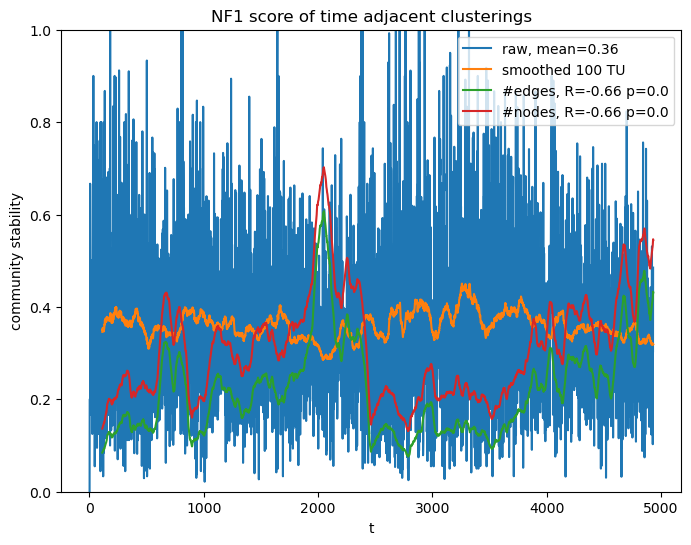

In [16]:
STC_RANDOM.plot_community_stability_trend(100, True)

Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append most recent score or 0
Append mos

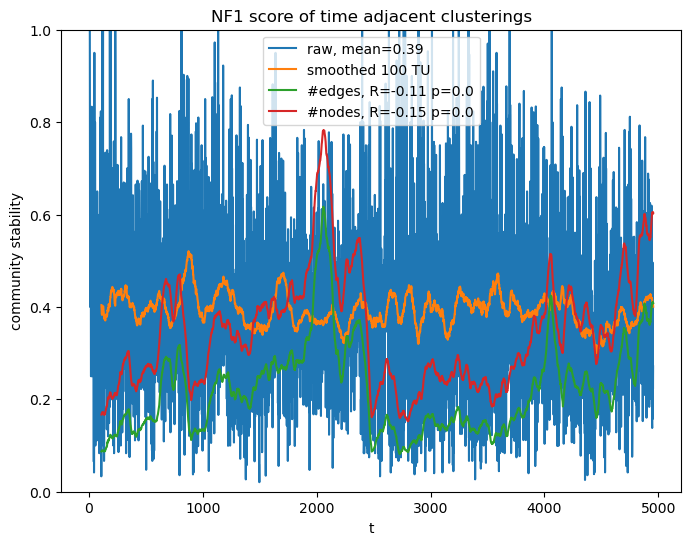

In [14]:
STC_RANDOM.plot_community_stability_trend(100, False)

Append most recent score


UnboundLocalError: cannot access local variable 'stb' where it is not associated with a value

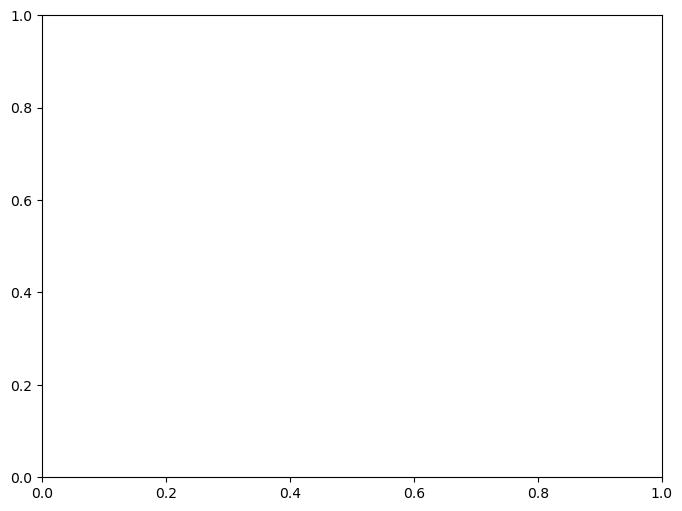

In [24]:
STC_RANDOM.plot_community_stability_trend(10, True)

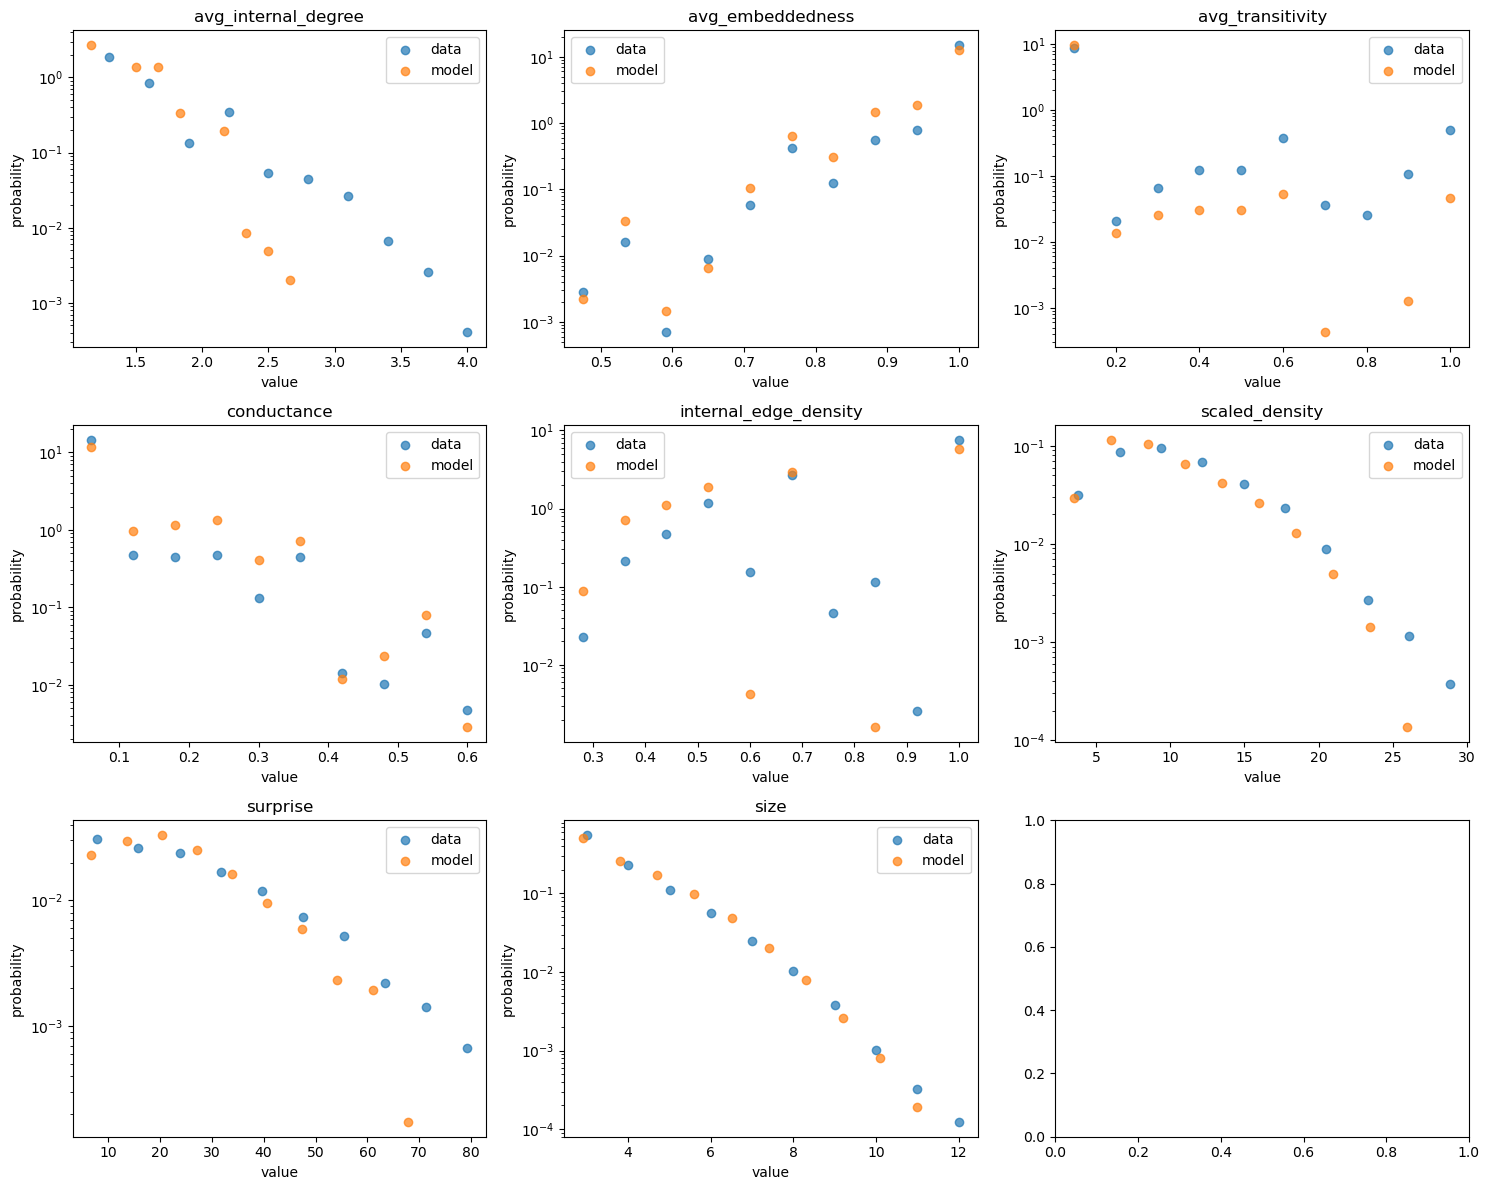

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
axs = axs.flatten()
STC_RANDOM.plot_cluster_analysis_overview('log', (fig, axs), approx=False)
STC_RANDOM.plot_cluster_analysis_overview('log', (fig, axs), approx=True)

Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score


ValueError: x and y must have the same length.

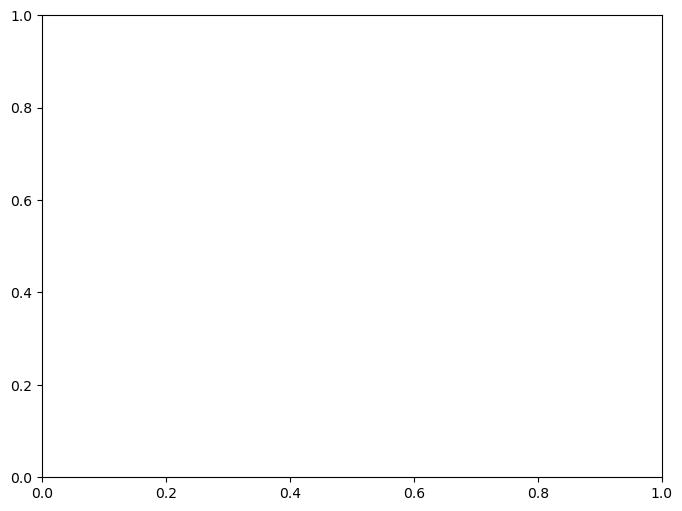

In [18]:
STC_RANDOM.plot_community_stability_trend(100, True)

In [3]:
# Make networks
path = './data_eval_split/supermarked/'
files = os.listdir(path)
EN = en.EvaluationNetwork('supermarked', path + files[2], 20)
EN.to_tacoma_tn()
obs = 1
dg, nx_graph_single = EN.make_dynetx(EN.tn, obs=obs)

edge list errors:  0
edge changes errors:  0


In [47]:
STC = SuperTemporalClustering(list(nx_graph_single.values()))
STC.detect_communities(algorithms.louvain, kwargs={'resolution': 1.})

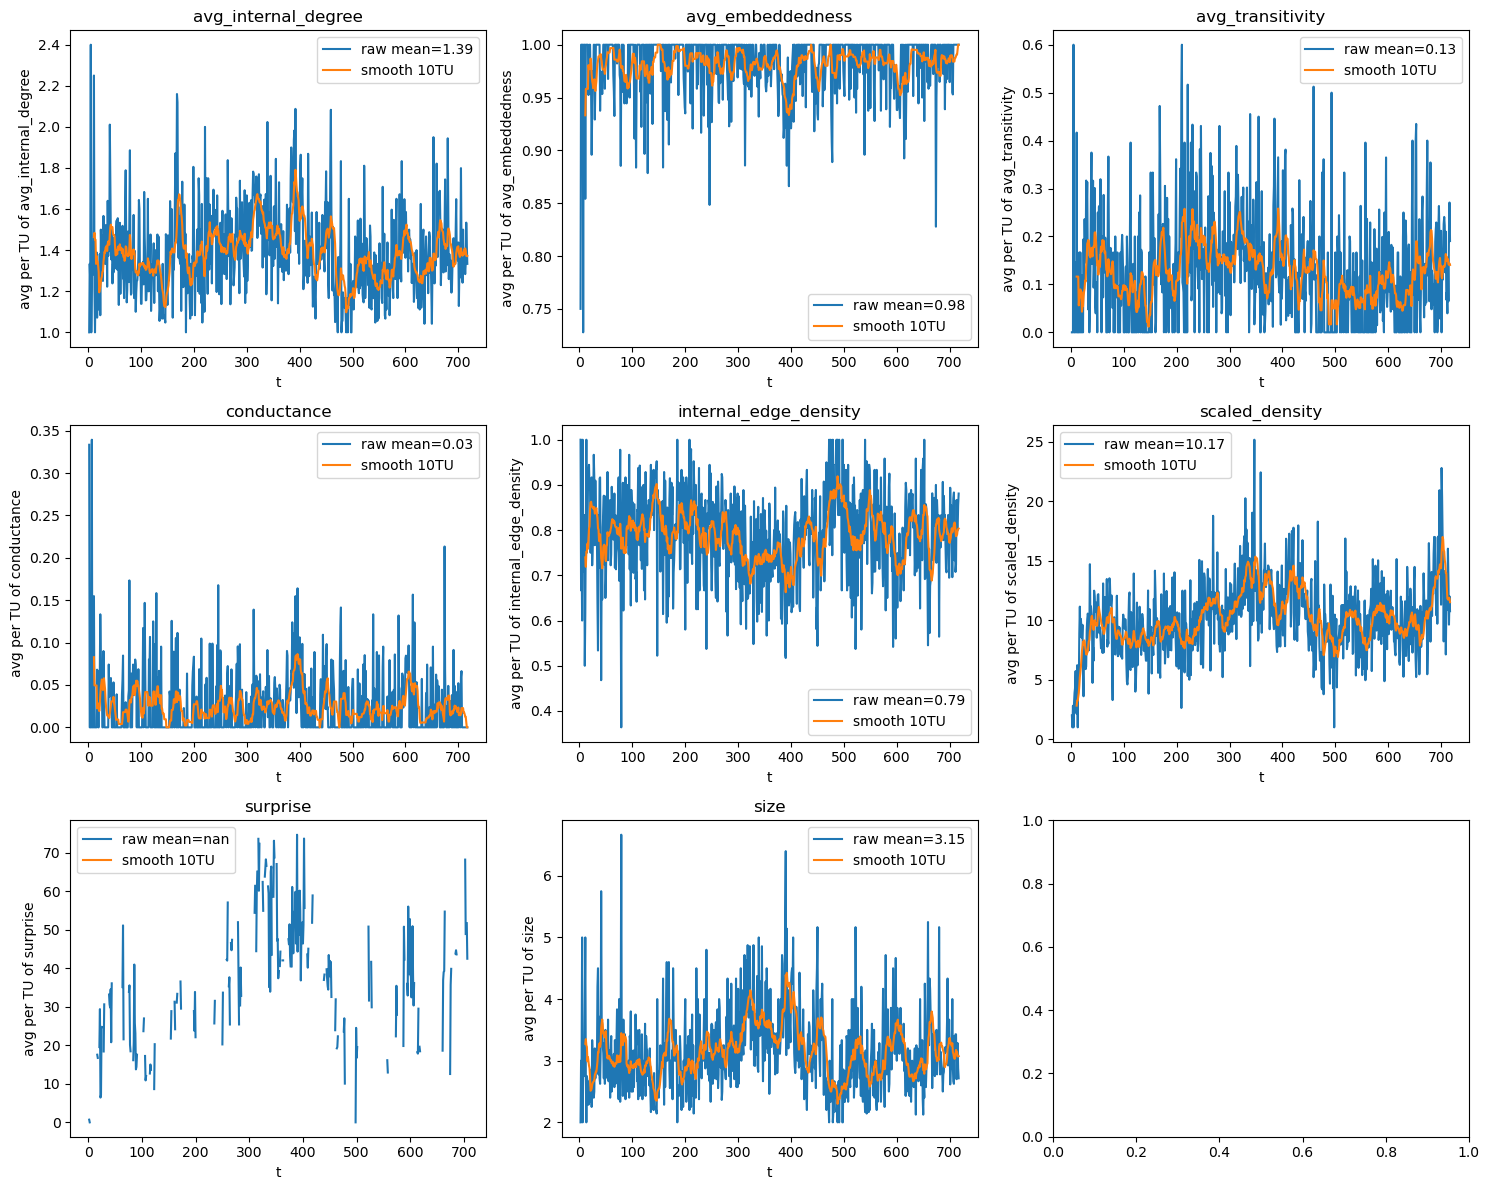

In [22]:
STC.plot_cluster_timeseries_overview()

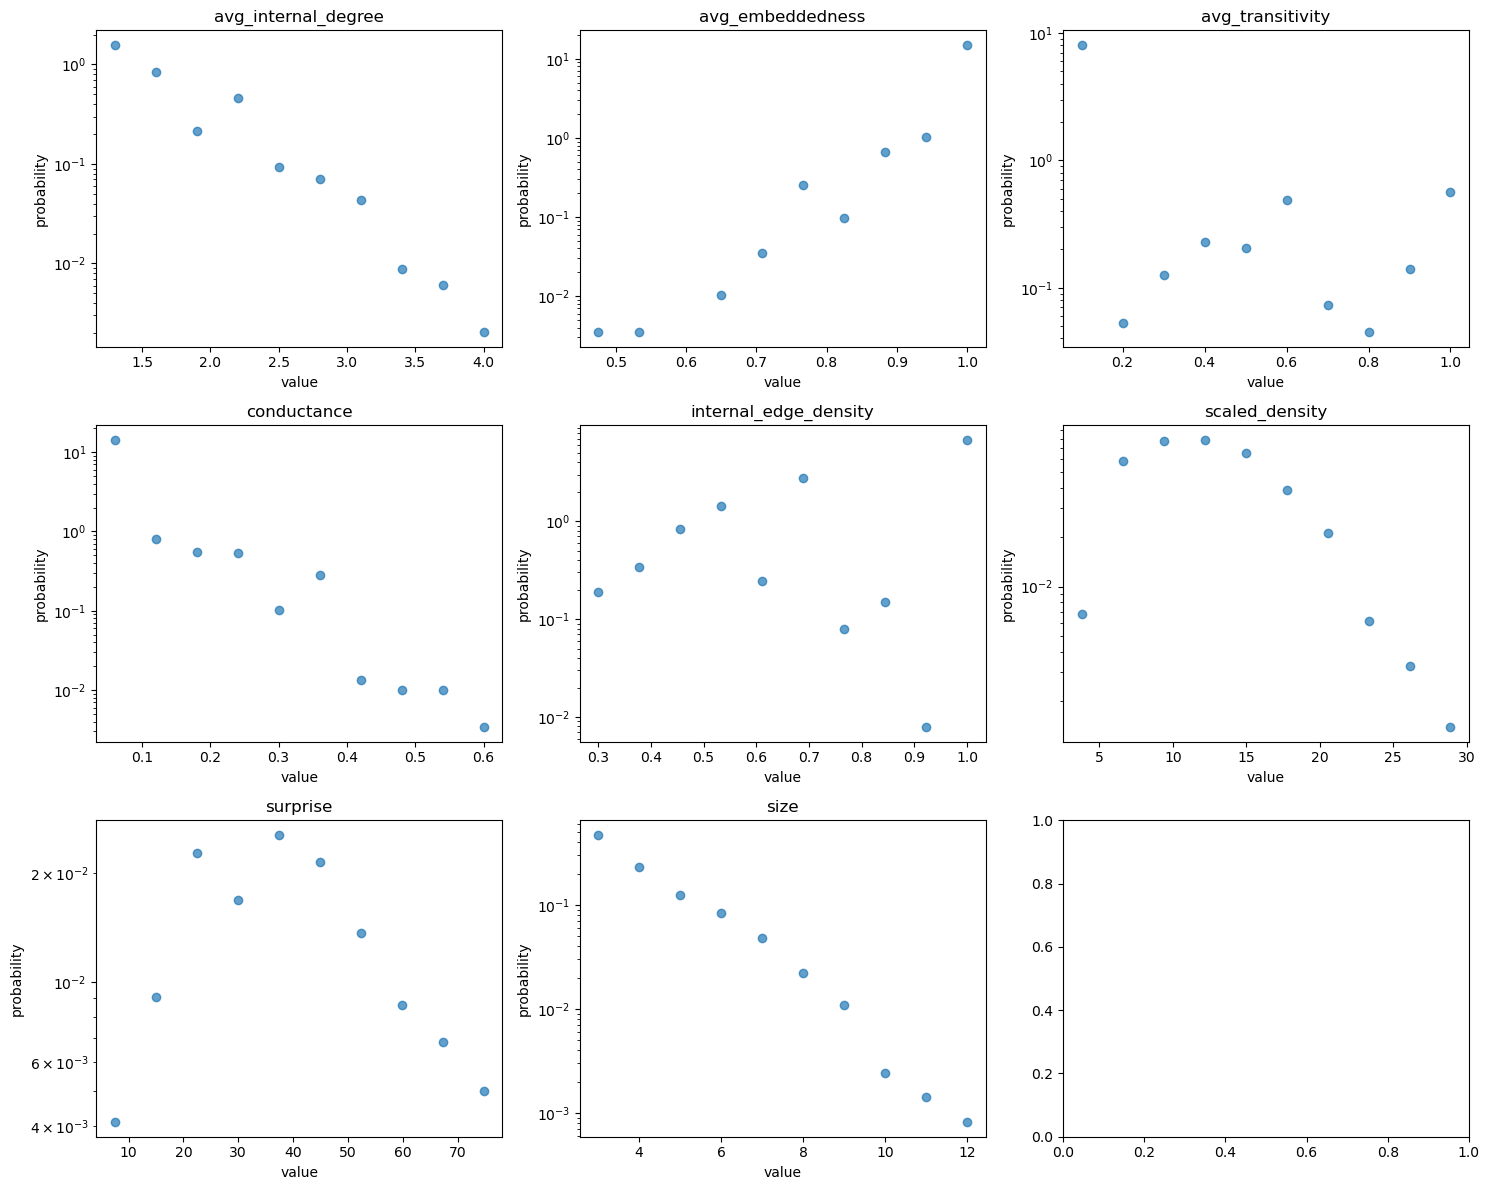

In [162]:
STC.plot_cluster_analysis_overview('log')

Append most recent score
Append most recent score


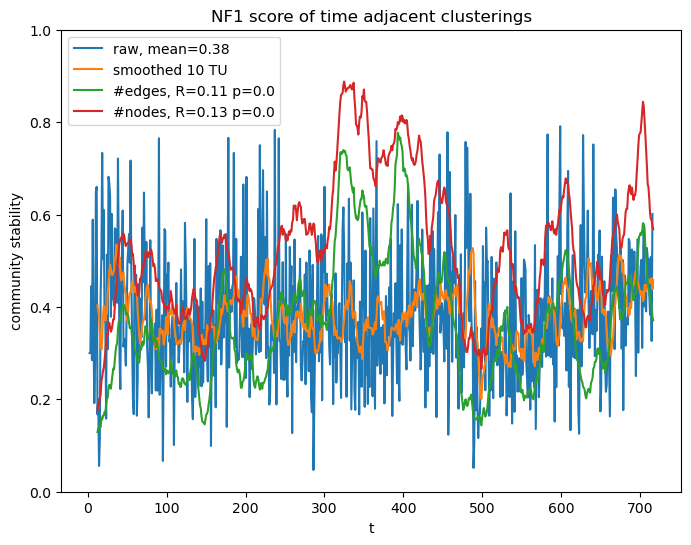

In [48]:
STC.plot_community_stability_trend()

In [ ]:
'''fig, axs = plt.subplots(3, 3, figsize=(15, 12))
axs = axs.flatten()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for nx_graphs, color in zip(nx_graphs_all_days, colors):
    STC = SuperTemporalClustering(list(nx_graphs.values()))
    STC.detect_communities(algorithms.louvain)

    for method, ax in zip(STC.method_func.keys(), axs):
        STC.plot_cluster_analysis(method, ax, scale='log', color=color)

plt.tight_layout()'''

In [85]:
# Make networks for all days
EN_list = []
for file in files[:6]:
    EN_list.append(en.EvaluationNetwork('supermarked', path + file, 20))

STC_ALL = SuperTemporalClustering(EN_list)
STC_ALL.detect_communities(algorithms.louvain, kwargs={'resolution': 1.})

edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0


Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score
Append most recent score


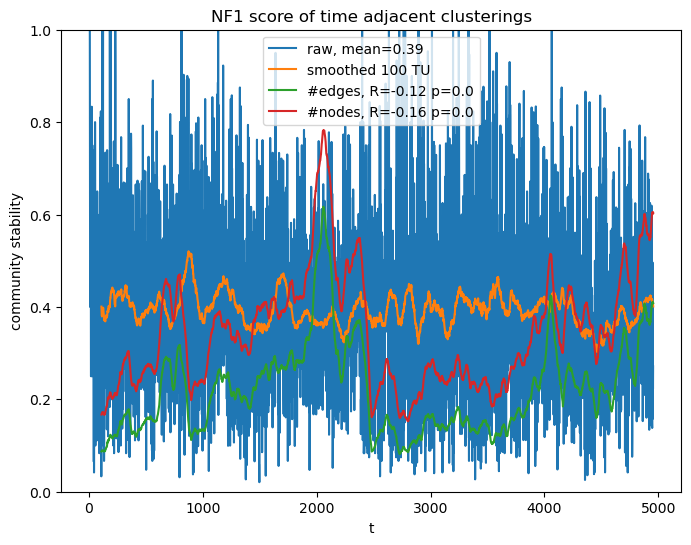

In [86]:
STC_ALL.plot_community_stability_trend(100)

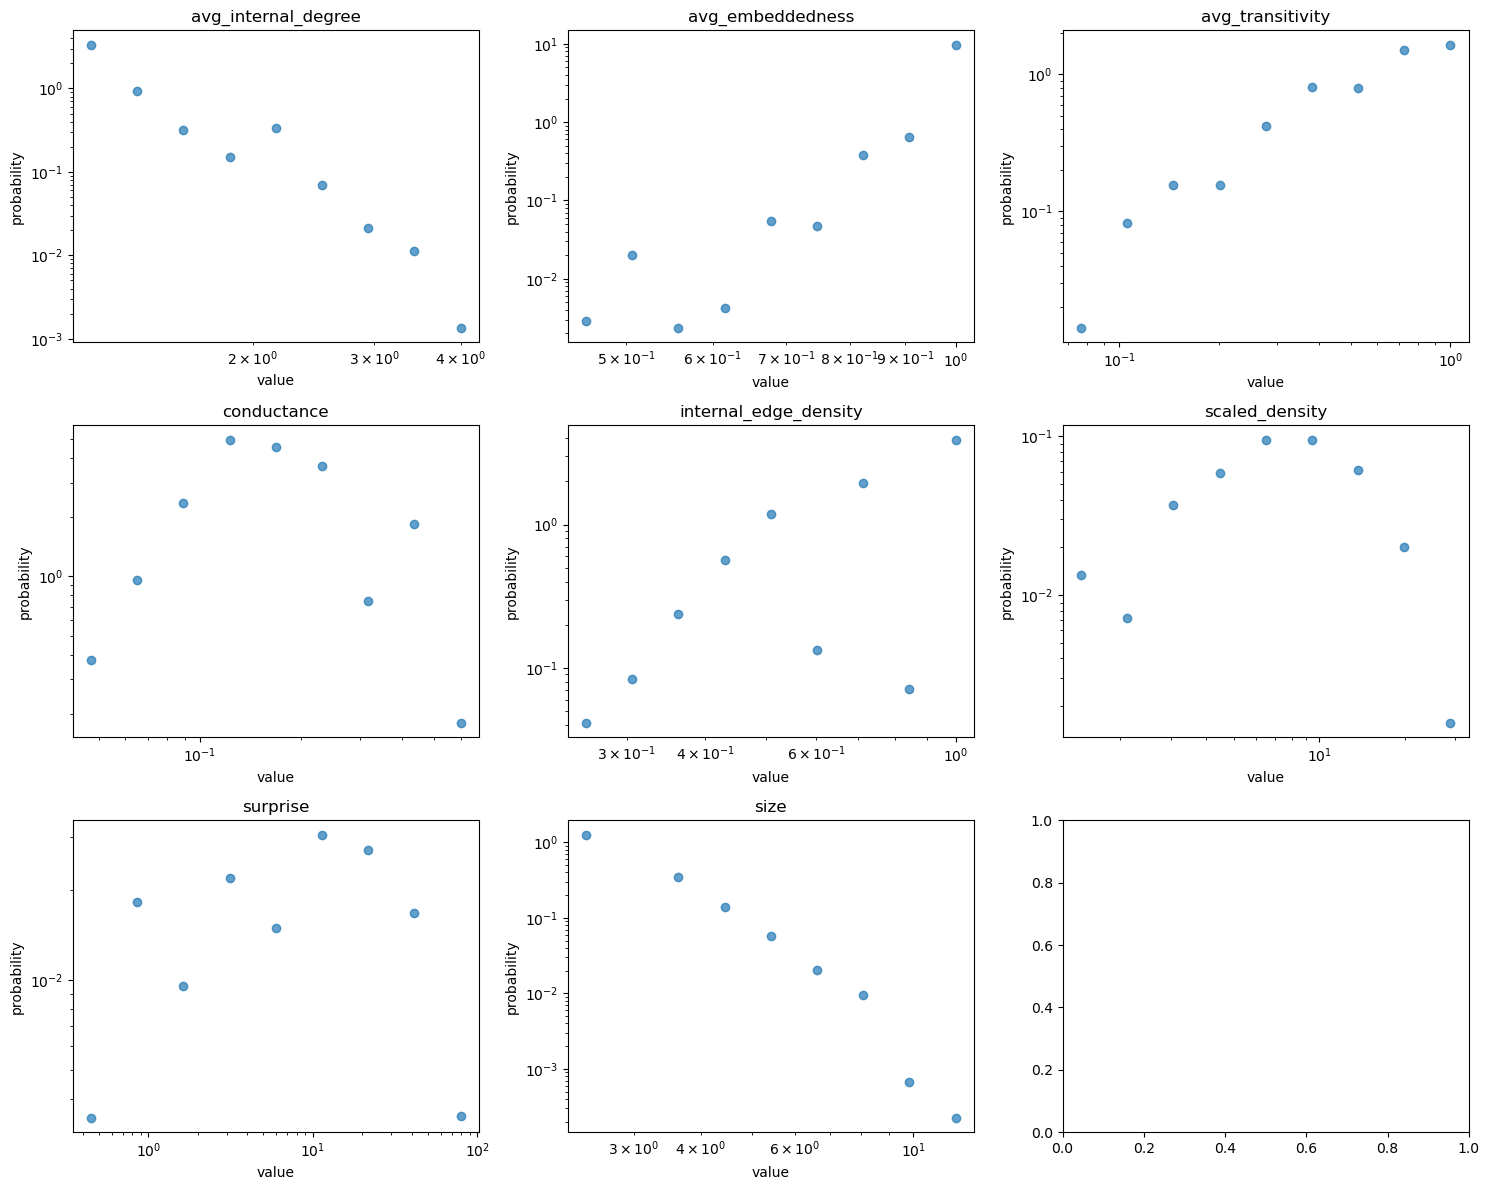

In [171]:
STC_ALL.plot_cluster_analysis_overview(scale='loglog')

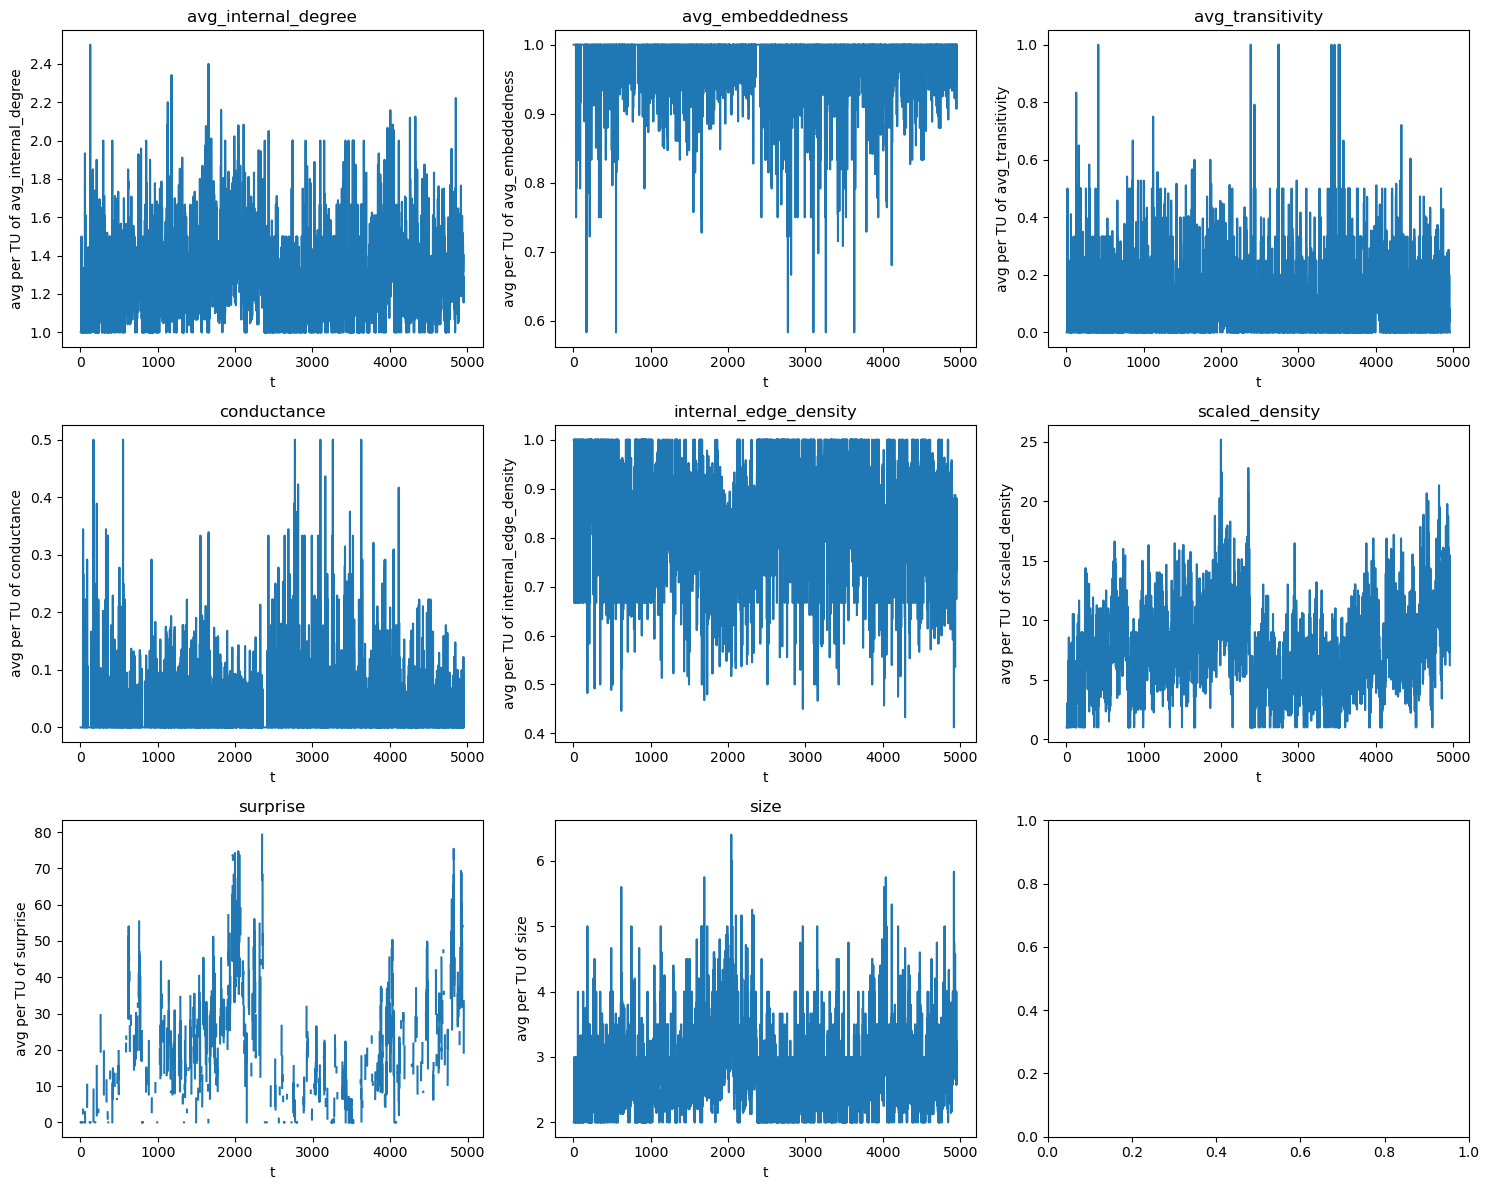

In [167]:
STC_ALL.plot_cluster_timeseries_overview()

# Compare to random approach

In [64]:
EN = en.EvaluationNetwork('supermarked', path + files[2], 20)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(None)

n_space = 10
p_add, pareto_shape = .02, 2.0

Loc = cn.Location(0, n_space, n_space, 3.1, 3.1)
model_kwargs = {'p_add': p_add, 'pareto_shape': pareto_shape}
EN.cn_approximation(Loc, 'random', model_kwargs)
res = EN.overview_plots(True, 4, 3)
tn_random = EN.tn_approx

obs=1
dg, nx_graph_random = EN.make_dynetx(EN.tn_approx, obs=obs)

STC_RANDOM = SuperTemporalClustering(list(nx_graph_random.values()))
STC_RANDOM.detect_communities(algorithms.louvain, kwargs={'resolution': 1.})

edge list errors:  0
edge changes errors:  0
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network construction
edge changes errors:  0


Append most recent score
Append most recent score


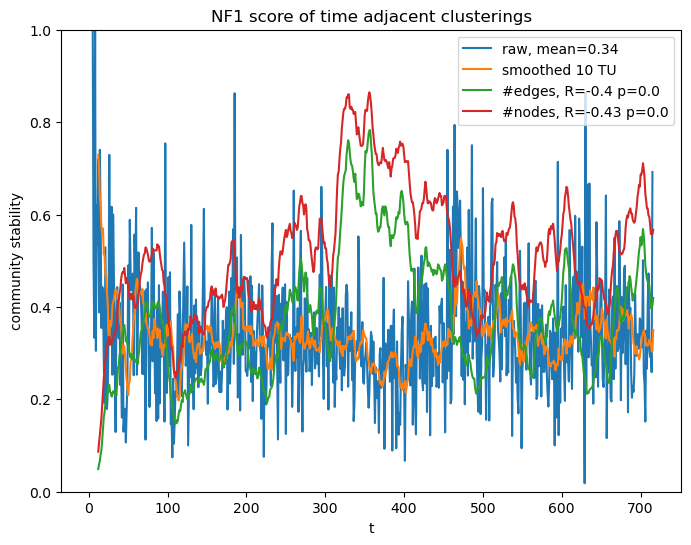

In [65]:
STC_RANDOM.plot_community_stability_trend(10)

# Highschool

In [17]:
path_highschool = './data_eval_split/highschool/'
files_highschool = os.listdir(path_highschool)

STC_HS = SuperTemporalClustering([en.EvaluationNetwork('highschool', path_highschool + file, 1) for file in files_highschool[:5]])
STC_HS.detect_communities(algorithms.louvain, kwargs={'resolution': 1.})

n_space = 10
p_add, pareto_shape = .0015, 1.5

Loc = cn.Location(0, n_space, n_space, 3.1, 3.1)
model_kwargs = {'p_add': p_add, 'pareto_shape': pareto_shape}

STC_HS.approximate_network(90, 'random', Loc, model_kwargs, overview=True)
STC_HS.detect_communities(approx=True)

edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network construction
this time value t = 0,000000 at it = 0 is smaller or equal than the last time value t_last = 0,000000
edge changes errors:  1
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network construction
this time value t = 0,000000 at it = 0 is smaller or equal than the last time value t_last = 2025559941533022965985091484506848980611397965888791521910759457257653273932752976830793413580407091850666622605558077743759147168568198085631265052751296565478044331807866880,000000
edge changes errors:  1
Initialized conta

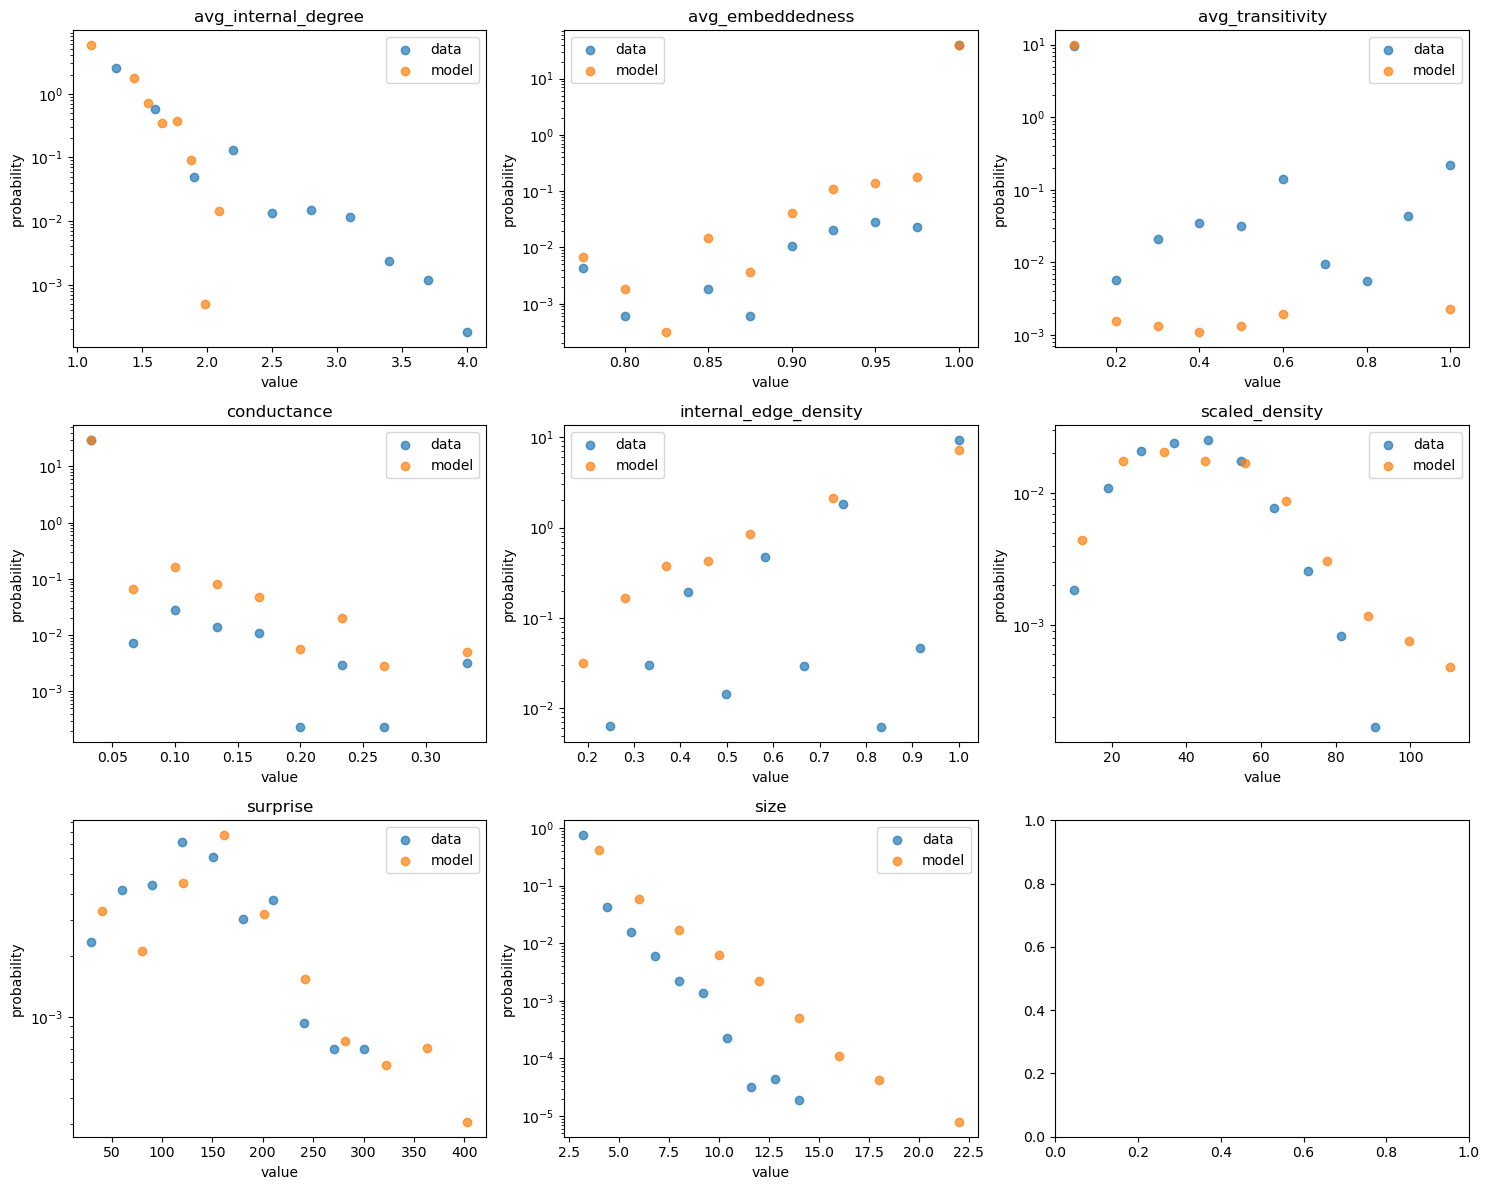

In [144]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
axs = axs.flatten()
STC_HS.plot_cluster_analysis_overview('log', (fig, axs), approx=False)
STC_HS.plot_cluster_analysis_overview('log', (fig, axs), approx=True)

In [75]:
EN = en.EvaluationNetwork('highschool', path_highschool + files_highschool[0], 1)
EN.to_tacoma_tn()
EN.eval_df_to_trajectory(90)

n_space = 10
p_add, pareto_shape = .0015, 1.5

Loc = cn.Location(0, n_space, n_space, 3.1, 3.1)
model_kwargs = {'p_add': p_add, 'pareto_shape': pareto_shape}
EN.cn_approximation(Loc, 'random', model_kwargs)
res = EN.overview_plots(True, 4, 3)
tn_random = EN.tn_approx
obs=1
dg, nx_graph_random = EN.make_dynetx(EN.tn_approx, obs=obs)

STC_HS_RANDOM = SuperTemporalClustering(list(nx_graph_random.values()))
STC_HS_RANDOM.detect_communities(algorithms.louvain, kwargs={'resolution': 1.})

edge list errors:  0
edge changes errors:  0
Initialized contact network model
Start making movement
random is not movement based. Return
finished simulation 
start working on network
Start network construction
this time value t = 0,000000 at it = 0 is smaller or equal than the last time value t_last = 0,000000
edge changes errors:  1


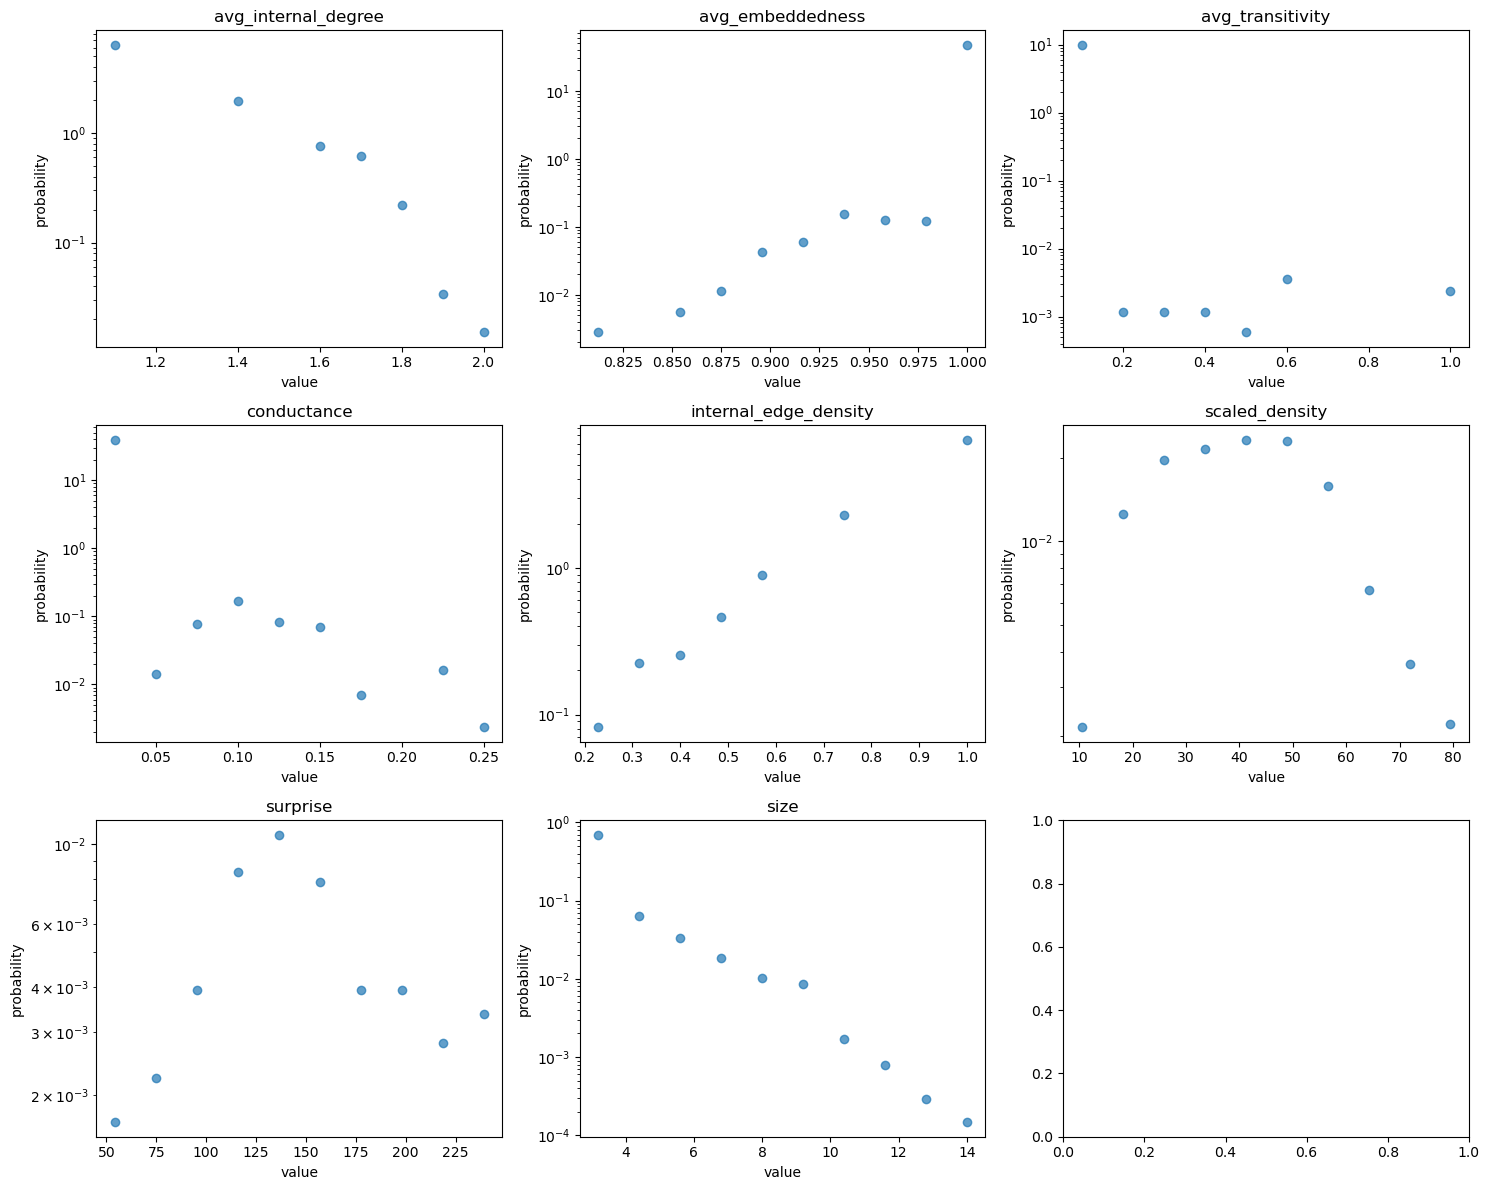

In [78]:
STC_HS_RANDOM.plot_cluster_analysis_overview('log')

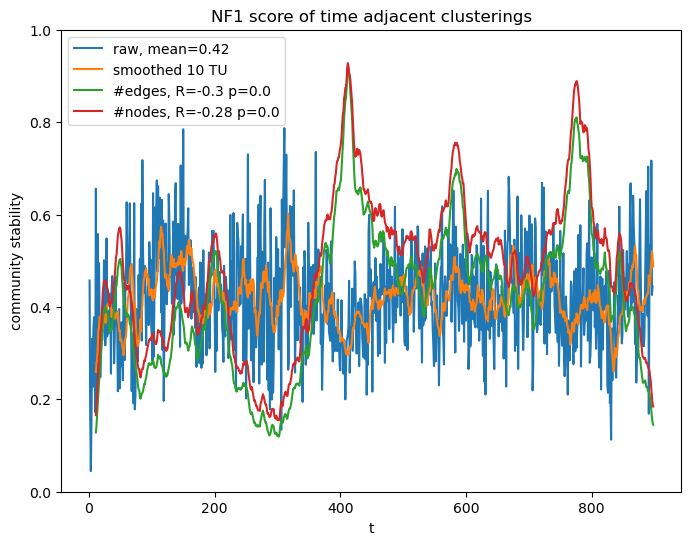

In [77]:
STC_HS_RANDOM.plot_community_stability_trend(smoothing=10)

In [80]:
EN = en.EvaluationNetwork('highschool', path_highschool + files_highschool[0], 1)
EN.to_tacoma_tn()

tn = EN.tn
obs=1
dg, nx_graph_hs = EN.make_dynetx(EN.tn, obs=obs)

STC_HS = SuperTemporalClustering(list(nx_graph_hs.values()))
STC_HS.detect_communities(algorithms.louvain, kwargs={'resolution': 1.})

edge list errors:  0
edge changes errors:  0


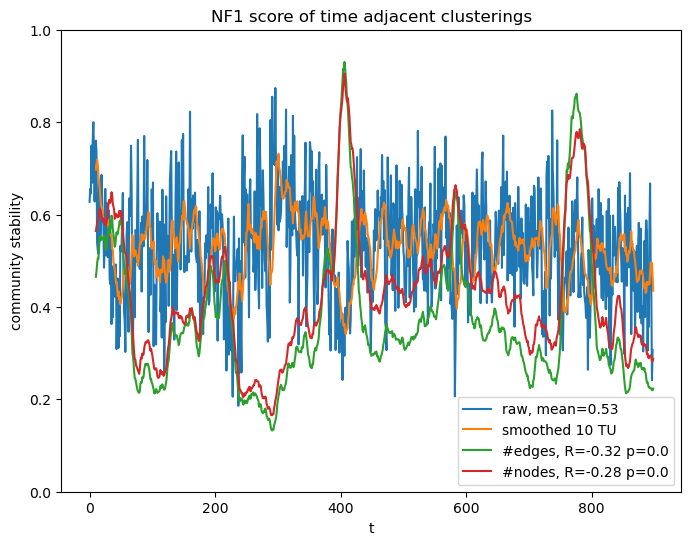

In [81]:
STC_HS.plot_community_stability_trend(10)

# Primary School

In [106]:
'''STC_PS = SuperTemporalClustering([en.EvaluationNetwork('primaryschool')])
STC_PS.detect_communities()'''

path_primary = './data_eval_split/primaryschool/'
files_primary = os.listdir(path_primary)
EN_list = [en.EvaluationNetwork('primary', path_primary + file) for file in files_primary]

STC_PS = SuperTemporalClustering(EN_list)
STC_PS.detect_communities()

edge list errors:  0
edge changes errors:  0
edge list errors:  0
edge changes errors:  0


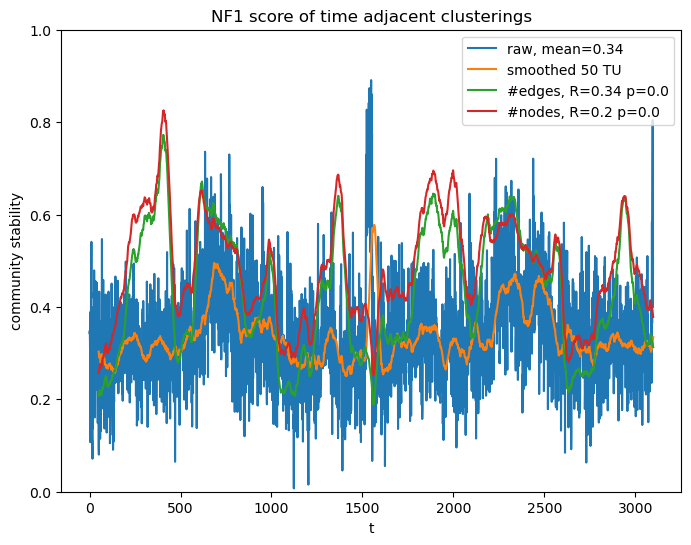

In [108]:
STC_PS.plot_community_stability_trend(50)

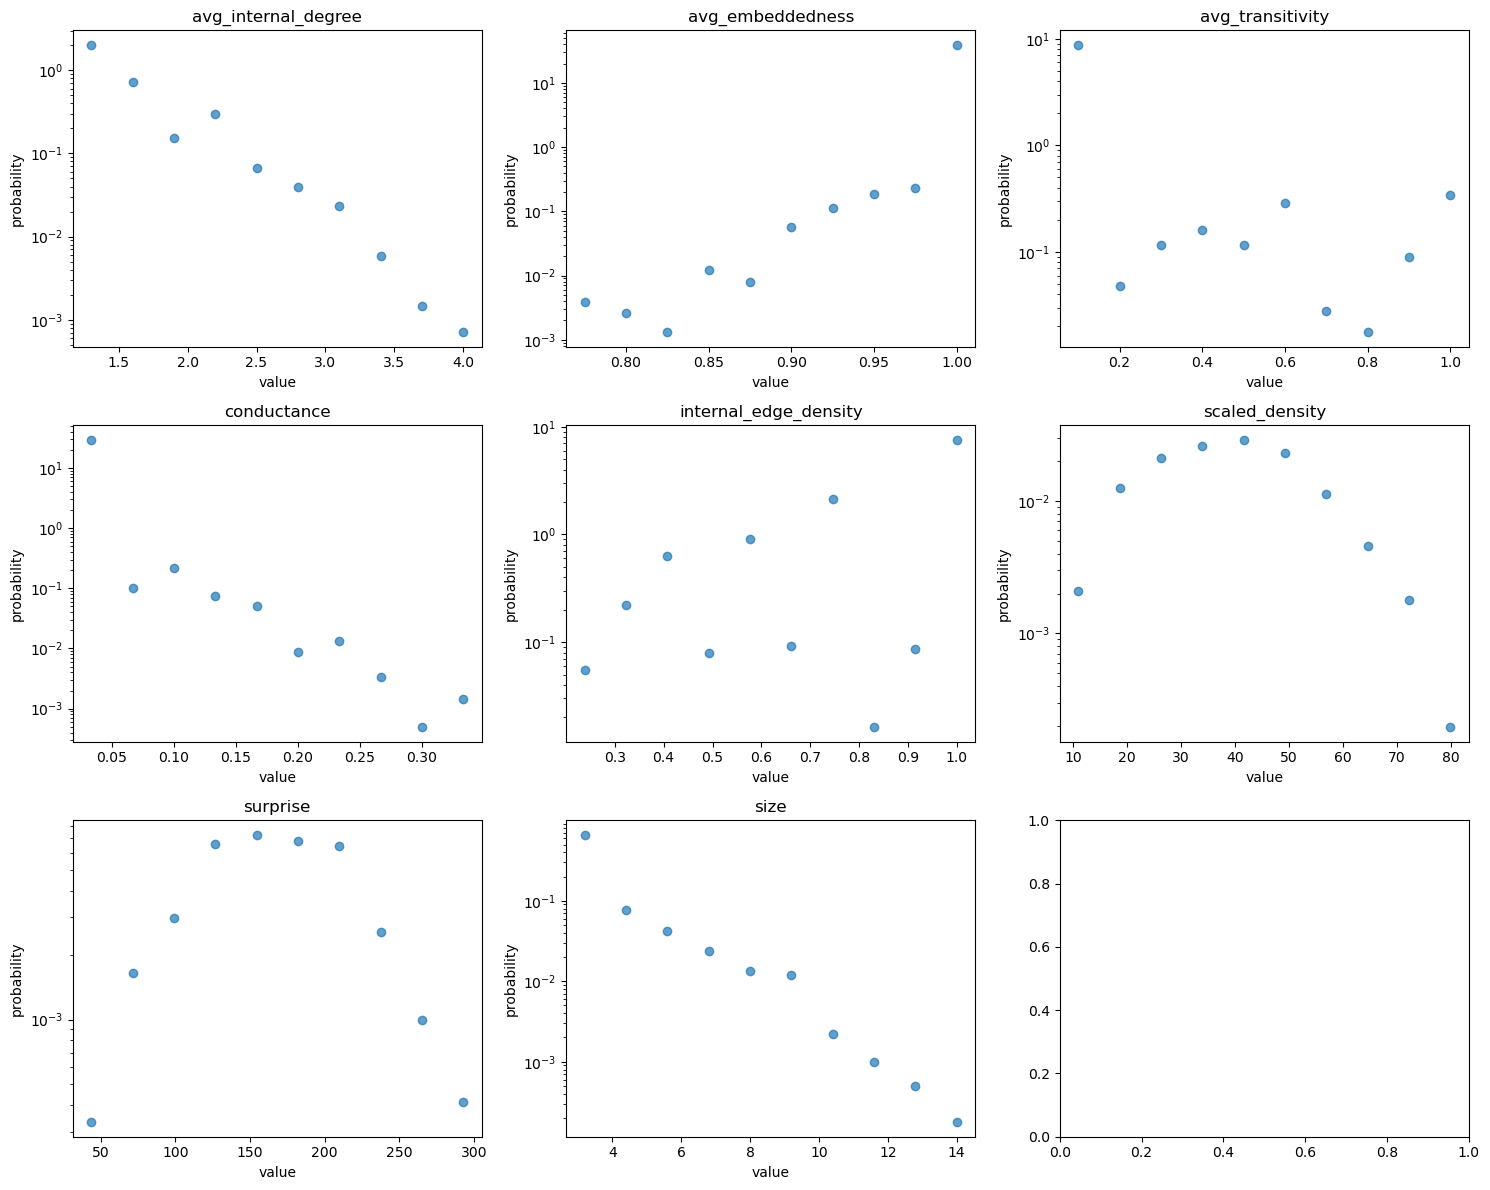

In [109]:
STC_PS.plot_cluster_analysis_overview('log')